In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import jax
import jax.numpy as jnp
from tinyjaxley.modules.comp import Compartment
from tinyjaxley.modules.branch import Branch
from tinyjaxley.modules.cell import Cell
from tinyjaxley.channels.hh import Na, K, Leak
import matplotlib.pyplot as plt
from tinyjaxley.solvers import fw_euler
import pandas as pd
from diffrax import diffeqsolve, ODETerm, SaveAt, Dopri5

- recurse into channels -> set and get should work for example
    - submodules should get custom method for each module, i.e. comp.channels -> comp.submodules, branch.comps -> branch.submodules, etc.
- fix `comp.set(("k", "n"), 0.0)` same for `clamp` and `record`
- tests to assert against jaxley

In [21]:
comp = Compartment()
# comp.record("v")
# comp.add(Leak())
# comp.add(Na())
# comp.add(K())
# comp.stimulate(lambda t, u, p: 0.01)

# t0 = 0
# p = comp.params
# comp.set("v", -70.0)
# u0 = comp.init(t0, comp.states, comp.params)

In [12]:
# branch = Branch([comp]*2)

In [55]:
# def sum_i(tree):
#     return sum(jax.tree.flatten(find("i", tree, 0.0))[0])


# t = 0.0
# u_global = {"v": u0.pop("v"), "i": u0.pop("i")}
# p_global = {"c": p.pop("c"), "Ra": p.pop("Ra"), "l": p.pop("l"), "r": p.pop("r")}
# v = u_global["v"]

# is_channel = lambda d: not (isinstance(d, dict) and d is comp.channels)
# def body(channel, u, p): return channel.vf(t, u, p, v)
# du = jax.tree.map(body, comp.channels, u0, p, is_leaf = is_channel)
# du["i"] = comp.i(t, u_global, p_global)
# du["v"] = (du["i"] - sum_i(du) * 1000.0) / p_global["c"]

In [4]:
ode = ODETerm(comp.vf)
tspan = (0, 20)
ts = jnp.arange(*tspan, 0.025)
saveat = SaveAt(ts = ts)
sol = diffeqsolve(ode, Dopri5(), *tspan, y0 = u0, dt0 = 0.025, saveat = saveat, args = p)

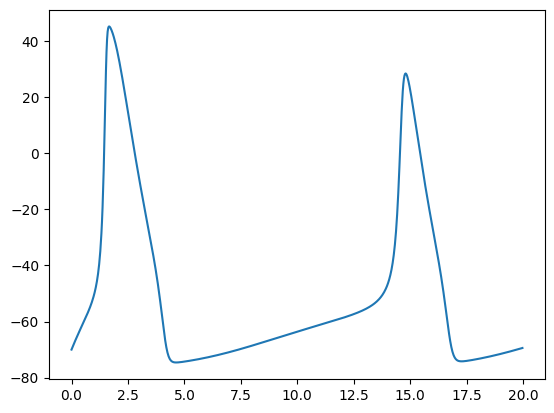

In [5]:
plt.plot(sol.ts, sol.ys["v"])

In [20]:
branch = Branch([Compartment()]*100)
branch.record("v")
branch.add(Leak())
branch.add(Na())
branch.add(K())
branch.comp(0).stimulate(lambda t, u, p: 0.05)
branch.comp(1).stimulate(lambda t, u, p: -0.05)

t0 = 0
p = branch.params
u0 = branch.init(t0, branch.states, branch.params)
branch.set("v", -70.0)

In [21]:
ode = ODETerm(branch.vf)
tspan = (0, 20)
ts = jnp.arange(*tspan, 0.025)
saveat = SaveAt(ts = ts)
sol = diffeqsolve(ode, Dopri5(), *tspan, y0 = u0, dt0 = 0.025, saveat = saveat, args = p)

KeyboardInterrupt: 